In [110]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from matplotlib import pyplot as plt

### 1) Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [10]:
X, y = load_diabetes(return_X_y=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [201]:
class GradientBoostingRegressor:
    def __init__(self, n_trees, max_depth=3, learning_rate=1e-5, *args, **kwargs):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = None
        self.args = args
        self.kwargs = kwargs
        
    @staticmethod
    def mse(true, pred):
        return np.sum((true - pred)**2) / len(true)
    
    @staticmethod
    def bias(true, pred):
        return true - pred
    
    def predict(self, X):
        return np.sum([self.learning_rate * tree.predict(X) for tree in self.trees], axis=0)
    
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.trees = []
        self.train_errors = []
        self.test_errors = []
        
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(*self.args, **self.kwargs)
            if len(self.trees)==0:
                tree.fit(X_train, y_train)
            else:
                y_pred = self.predict(X_train)
                tree.fit(X_train, self.bias(y_train, y_pred))
                
            self.trees.append(tree)
            self.train_errors.append(self.mse(y_train, self.predict(X_train)))
            
            if X_test is not None and y_test is not None:
                self.test_errors.append(self.mse(y_test, self.predict(X_test)))

In [208]:
max_depths = [i for i in range(1, 7)]
errors = []

for depth in max_depths:
    model = GradientBoostingRegressor(max_depth=depth, n_trees=80, learning_rate=0.1)
    model.fit(X_train, y_train, X_test, y_test)
    errors.append(model.test_errors)

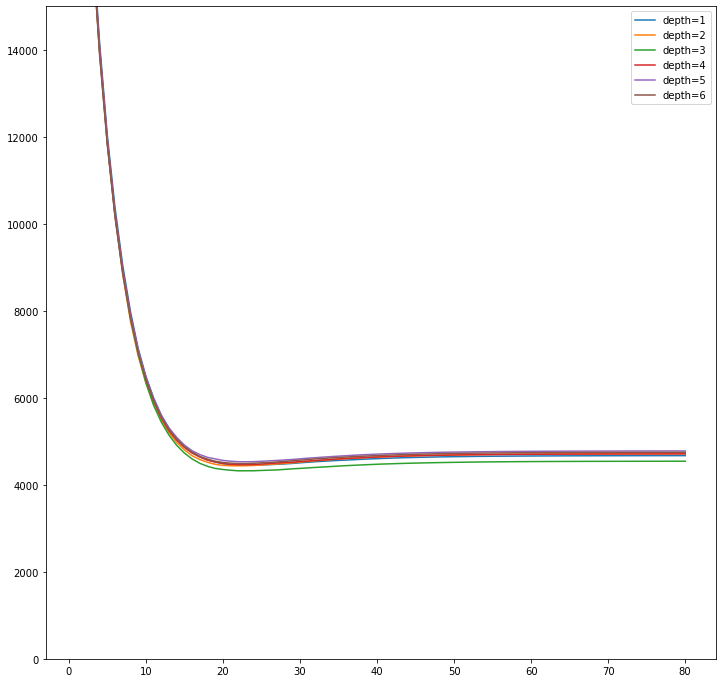

In [230]:
fig, ax = plt.subplots(figsize=(12,12))

for depth, err in enumerate(errors, 1):
    ax.plot(np.arange(1, 81), err, label=f'depth={depth}')
    
plt.ylim(0, 15000)
plt.legend()
plt.show()

### Видно, что лучшая модель с глубиной 3, однако, все они начинают переобучаться приблизительно на 20-25 итерациях, проверю, какой номер итерации соответствует минимальной ошибке на тестовой выборке для модели глубиной 3. Это 22 дерева

In [227]:
np.argmin(errors[2])

21

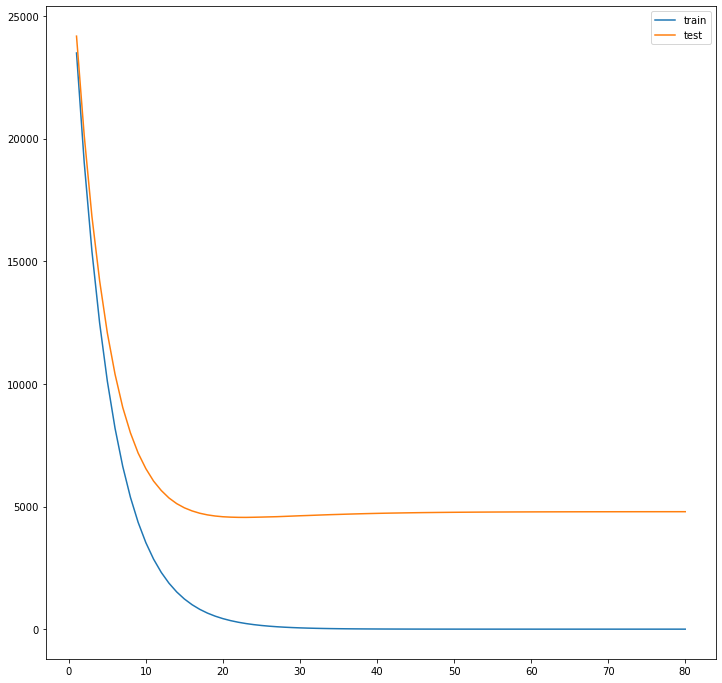

In [234]:
model = GradientBoostingRegressor(n_trees=80, max_depth=3, learning_rate=0.1, random_state=1)
model.fit(X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(figsize=(12,12))

ax.plot(np.arange(1, 81), model.train_errors, label='train')
ax.plot(np.arange(1, 81), model.test_errors, label='test')

plt.legend()
plt.show()